# Prepare "image" RSP files for CNN retrieval
#--------------------------------------------
1. Saves correlated and random noise realizations as images
   for either I/Q or DOLP elements
2. Save targets as csv/txt file to be read by matlab
3. First attemp is processed with matlab CNN toolbox

In [2]:
# import neccesary modules for this module
#-------------------------------------------
import pandas as pd
import numpy as np
import scipy as sio
import scipy.stats as stats
import netCDF4 as nc4
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm
from matplotlib.collections import LineCollection
from matplotlib.patches import Polygon
from matplotlib.patches import Polygon
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import shapefile
# image processing
import PIL
import skimage
from skimage.io import imsave
import matplotlib.image as mpimg
from skimage import io, exposure, img_as_uint, img_as_float
%matplotlib inline

In [3]:
## read netcdf parameters from LUT or measurements files
## nc_file is full file path, 
## e.g. filepath = '..//..//py_data//oracles_NN//training//NNcld_20150911_20160102_20160420_nonoise.nc'
## varname is netcdf variable name string in file, e.g. "ref_i"
##--------------------------------------------------------------

def read_nc_file( nc_file, varname ):
    f = nc4.Dataset(nc_file)
    data = f.variables[varname]
    #f.close()
    return data;

In [4]:
## cat netcdf parameters from LUT or measurements files
## to create dataframe in pandas, 
## colname is column name to change from default
## this version is based on create_df_from_nc
## but reads and saves the 3D arrays in a way that is 
## suites for CNN input
##-----------------------------------------------------

def create_df_from_nc4CNN( nc_data, colname ):
    df = pd.DataFrame([])
    # check data size and length 
    l = len(nc_data.shape)
    vza = np.arange(24,125)
    # if l=3 cat dataframe, if l=1 save var as df
    if   l==3:
        # wavelength is the 2nd dim
        for i in range(nc_data.shape[2]):
            tmp = pd.DataFrame(np.transpose(nc_data[vza,:,i]))# only VZA -40 to 40
            # print tmp.shape; this has size of 7x101
            if (i==0):
                out = tmp
                #print out.shape
            else:
                # stack all 2D arrays into a multidimentional array
                out = np.dstack((out, tmp))
                
    elif l==2:
            tmp = pd.DataFrame(np.transpose(nc_data[3,:])) # 3 is the VZA index (all rows suppose to be similar)
            df=df.append(pd.DataFrame(tmp))
            # rename column name
            df.rename(columns=lambda x: colname, inplace=True)
            out = []
    elif l==1:
            df=df.append(pd.DataFrame(nc_data[:]))
            # rename column name
            df.rename(columns=lambda x: colname, inplace=True)
            out = []
    return df, out;

In [5]:
## this function concatanates nc files (with noise) for training purposes
## nc_array - a string array with strings for full files path
## var_in   - the variable to read from nc file (e.g. "ref_i")
## var_out  - the variable to name df columns
##---------------------------------------------------------------------------
def concat_nc_files( nc_array, var_in, var_out):
    
    df = pd.DataFrame([])
    
    for idx, fi in enumerate(nc_array):
        # read nc file
        tmp_ = read_nc_file( fi,   var_in )
        # convert nc to df
        tmp  = create_df_from_nc( tmp_, var_out )
        # print note
        print ('concat file#%d:, %s' % (idx + 1, fi))
        # concat df
        df=df.append(pd.DataFrame(tmp))
        
    
    # re-index according to row numbers
    df.index = range(len(df))
    
    print "final concat file size"
    print df.shape
    
    print "concat df"
    print df.tail()
        
    return df

In [6]:
## cat netcdf parameters from LUT or measurements files
## to create dataframe in pandas, 
## colname is column name to change from default
##-----------------------------------------------------

def create_df_from_nc( nc_data, colname ):
    df = pd.DataFrame([])
    # check data size and length 
    l = len(nc_data.shape)
    vza = np.arange(24,125)
    # if l=3 cat dataframe, if l=1 save var as df
    if   l==3:
        # wavelength dim is the 2nd element
        for i in range(nc_data.shape[1]):
                #df=df.append(pd.DataFrame(nc_data[:,i,:]))
                tmp = pd.DataFrame(np.transpose(nc_data[vza,i,:]))# only VZA -40 to 40
                # rename column name
                tmp.rename(columns=lambda x: colname + '_lambda_' + str(i+1) + '_VZA_',
                               inplace=True)
                df = pd.concat([df, tmp], axis=1)
                
    elif l==2:
            tmp = pd.DataFrame(np.transpose(nc_data[3,:])) # 3 is the VZA index (all rows suppose to be similar)
            df=df.append(pd.DataFrame(tmp))
            # rename column name
            df.rename(columns=lambda x: colname, inplace=True)
    elif l==1:
            df=df.append(pd.DataFrame(nc_data[:]))
            # rename column name
            df.rename(columns=lambda x: colname, inplace=True)
    return df;

In [7]:
# process all noise realization into one file (this is test, so not all are here...)
with_noise_nc_array = ['..//..//py_data//oracles_NN//simulated_files//NN_clouds_20170505_PP_10_0000_0_90_cut.nc',
            '..//..//py_data//oracles_NN//simulated_files//NN_clouds_20170505_PP_11_0000_0_90_cut.nc',
            '..//..//py_data//oracles_NN//simulated_files//NN_clouds_20170505_PP_12_0000_0_90_cut.nc',
            '..//..//py_data//oracles_NN//simulated_files//NN_clouds_20170505_PP_13_0000_0_90_cut.nc',
            '..//..//py_data//oracles_NN//simulated_files//NN_clouds_20170505_PP_14_0000_0_90_cut.nc']

#with_noise_nc_array = ['..//..//py_data//oracles_NN//simulated_files//NN_clouds_20170505_PP_10_0000_0_90_cut.nc']

dat
(7L, 101L, 20736L)
F://ORACLES_NN//non_norm_images//ref_q//ref_q_img_000001.png
dat
(7L, 101L, 20736L)
F://ORACLES_NN//non_norm_images//ref_q//ref_q_img_000002.png
dat
(7L, 101L, 20736L)
F://ORACLES_NN//non_norm_images//ref_q//ref_q_img_000003.png
dat
(7L, 101L, 20736L)
F://ORACLES_NN//non_norm_images//ref_q//ref_q_img_000004.png
dat
(7L, 101L, 20736L)
F://ORACLES_NN//non_norm_images//ref_q//ref_q_img_000005.png


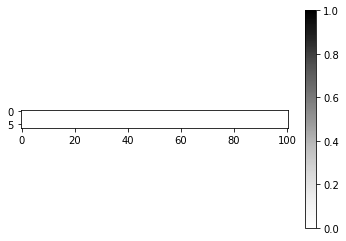

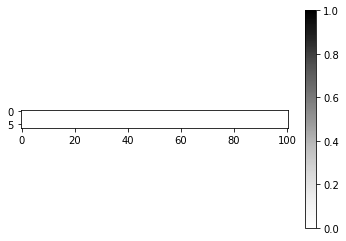

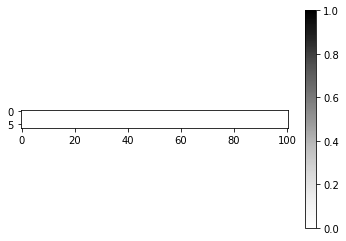

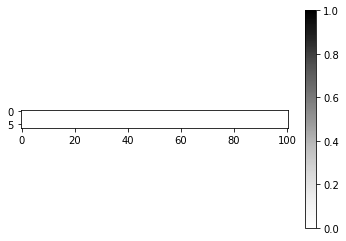

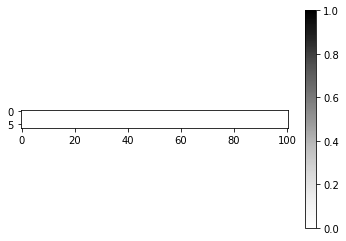

In [10]:
# create I/Q reflectance image set:
#----------------------------------
# run over each of the files and save data as images:
# create corresponding target arrays
# replace ref_i or ref_q

output_path = 'F://ORACLES_NN//non_norm_images//ref_q//'
k = 0 # count of figure number

for f in with_noise_nc_array:   
    tmp     = read_nc_file( nc_file=f, varname="ref_i" )
    df, dat = create_df_from_nc4CNN( tmp, colname = "ref_i")
    dat_test = np.absolute(dat[:,:,0:2])/dat[:,:,0:2]
    print "dat"
    print dat.shape
    
    # normalize (0-1) data, create and save images

    dat_norm = dat
    
    for i in range(1): #range(dat.shape[2]):
        k += 1
        min_max_scaler   = MinMaxScaler().fit(dat[:,:,i].T)
        dat_norm[:,:,i]  = min_max_scaler.fit_transform(dat[:,:,i].T).T
        # Convert array to Image
        #img = PIL.Image.fromarray(dat_norm[:,:,i])
        #img = exposure.rescale_intensity(dat_norm[:,:,i], out_range='float')
        img = img_as_float(img)
        
        # save array as image (retain values)
        #img = sio.misc.toimage(dat_norm[:,:,i], high=np.max(dat_norm[:,:,i]), low=np.min(dat_norm[:,:,i]), mode='I')
        #img.save('my16bit.png')
        
        #print img
        fname = output_path + "ref_q"  + '_img_{:06d}.png'.format(k)
        print fname
        plt.figure()
        imgplot = plt.imshow(img,cmap="Greys", vmin=0, vmax=1)
        plt.colorbar()
        #io.imsave(fname, img)
        #imsave(fname, img)
        

In [9]:
outputPath = 'F://ORACLES_NN//non_norm_images//targets//'

in_aux_vars  = ['azi','sza','cod','sizea','sizeb']
out_aux_vars = ['AZI','SZA','COD','REF','VEF']
print in_aux_vars
# save into a table/.csv files
for inx in range(len(in_aux_vars)):
    # read auxiliary variables and concat files
    df_out = concat_nc_files( with_noise_nc_array, in_aux_vars[inx],   out_aux_vars[inx])
    file_name = outputPath + out_aux_vars[inx] + ".csv"
    print 'file2save is: ' + file_name
    df_out.to_csv(file_name, header=True, index=False)

['azi', 'sza', 'cod', 'sizea', 'sizeb']
concat file#1:, ..//..//py_data//oracles_NN//simulated_files//NN_clouds_20170505_PP_10_0000_0_90_cut.nc
concat file#2:, ..//..//py_data//oracles_NN//simulated_files//NN_clouds_20170505_PP_11_0000_0_90_cut.nc
concat file#3:, ..//..//py_data//oracles_NN//simulated_files//NN_clouds_20170505_PP_12_0000_0_90_cut.nc
concat file#4:, ..//..//py_data//oracles_NN//simulated_files//NN_clouds_20170505_PP_13_0000_0_90_cut.nc
concat file#5:, ..//..//py_data//oracles_NN//simulated_files//NN_clouds_20170505_PP_14_0000_0_90_cut.nc
final concat file size
(103680, 1)
concat df
         AZI
103675   6.0
103676   8.0
103677  10.0
103678  12.0
103679  14.0
file2save is: F://ORACLES_NN//non_norm_images//targets//AZI.csv
concat file#1:, ..//..//py_data//oracles_NN//simulated_files//NN_clouds_20170505_PP_10_0000_0_90_cut.nc
concat file#2:, ..//..//py_data//oracles_NN//simulated_files//NN_clouds_20170505_PP_11_0000_0_90_cut.nc
concat file#3:, ..//..//py_data//oracles_NN//

In [12]:
# create I/Q/DOLP reflectance image set:
#----------------------------------
# run over each of the files and save data as images:
# create corresponding target arrays
# for both ref_i and ref_q (and for calculated dolp)
# add target parameters as seperate csv files (concat)

output_path_ref_i = 'F://ORACLES_NN//non_norm_images//ref_i//'
output_path_ref_q = 'F://ORACLES_NN//non_norm_images//ref_q//'
output_path_dolp  = 'F://ORACLES_NN//non_norm_images//dolp//'

k = 0 # count of figure number

for f in with_noise_nc_array: 
    # ref_i
    tmp_ref_i           = read_nc_file( nc_file=f, varname="ref_i" )
    df_ref_i, dat_ref_i = create_df_from_nc4CNN( tmp_ref_i, colname = "ref_i")
    # ref_q
    tmp_ref_q           = read_nc_file( nc_file=f, varname="ref_q" )
    df_ref_q, dat_ref_q = create_df_from_nc4CNN( tmp_ref_q, colname = "ref_q")
    # dolp
    dat_dolp = np.absolute(dat_ref_q)/dat_ref_i
    
    # normalize (0-1) data, create and save images

    dat_norm_ref_i = dat_ref_i
    dat_norm_ref_q = dat_ref_q
    dat_norm_dolp  = dat_dolp
    
    for i in range(dat.shape[2]):
        k += 1
        # ref_i
        #-------
        # this is normalized
        min_max_scaler_ref_i   = MinMaxScaler().fit(dat_ref_i[:,:,i].T)
        dat_norm_ref_i[:,:,i]  = min_max_scaler.fit_transform(dat_ref_i[:,:,i].T).T
        img_ref_i = exposure.rescale_intensity(dat_norm_ref_i[:,:,i], out_range='float')
        # this is non-normalized (no need to transpose)
        img_ref_i = exposure.rescale_intensity(dat_ref_i[:,:,i], out_range='float')
        img_ref_i = img_as_uint(img_ref_i)
        #print img
        fname = output_path_ref_i + "ref_i"  + '_img_{:06d}.png'.format(k)
        io.imsave(fname, img_ref_i)
        # ref_q
        #-------
        # this is normalized
        min_max_scaler_ref_q   = MinMaxScaler().fit(dat_ref_q[:,:,i].T)
        dat_norm_ref_q[:,:,i]  = min_max_scaler.fit_transform(dat_ref_q[:,:,i].T).T
        img_ref_q = exposure.rescale_intensity(dat_norm_ref_q[:,:,i], out_range='float')
        # this is non-normalized
        img_ref_q = exposure.rescale_intensity(dat_ref_q[:,:,i], out_range='float')
        img_ref_q = img_as_uint(img_ref_q)
        #print img
        fname = output_path_ref_q + "ref_q"  + '_img_{:06d}.png'.format(k)
        io.imsave(fname, img_ref_q)
        # dolp
        #-------
        # this is normalized
        min_max_scaler_dolp   = MinMaxScaler().fit(dat_dolp[:,:,i].T)
        dat_norm_dolp[:,:,i]  = min_max_scaler.fit_transform(dat_dolp[:,:,i].T).T
        img_dolp = exposure.rescale_intensity(dat_norm_dolp[:,:,i], out_range='float')
        # this is non-normalized
        img_dolp = exposure.rescale_intensity(dat_dolp[:,:,i], out_range='float')
        img_dolp = img_as_uint(img_dolp)
        #print img
        fname = output_path_dolp + "dolp"  + '_img_{:06d}.png'.format(k)
        io.imsave(fname, img_dolp)
        

In [6]:
output_path = 'D://ORACLES_NN//images//ref_i//'
    
tmp     = read_nc_file( nc_file=with_noise_nc_array[0], varname="ref_i" )
df, dat = create_df_from_nc4CNN( tmp, colname = "ref_i")
print dat.shape    
print with_noise_nc_array[0]
  

(7, 101)
(7L, 101L, 20736L)
..//..//py_data//oracles_NN//simulated_files//NN_clouds_20170505_PP_10_0000_0_90_cut.nc


In [17]:
# testing other packages without data precision loss
#----------------------------------------------------
from skimage import io, exposure, img_as_uint, img_as_float

#io.use_plugin('freeimage')

dat_norm = dat
k = 0
for i in range(2):#range(dat.shape[2]):
        k += 1
        min_max_scaler   = MinMaxScaler().fit(dat[:,:,i].T)
        dat_norm[:,:,i]  = min_max_scaler.fit_transform(dat[:,:,i].T).T
        # Convert array to Image
        img = exposure.rescale_intensity(dat_norm[:,:,i], out_range='float')
        img = img_as_uint(img)
        #print img
        fname = output_path + "ref_i"  + '_img_{:06d}.png'.format(k)
        print fname
        # save
        io.imsave(fname, img)
        
        # read saved image and plot (check)
        #img2 = io.imread(fname)
        #img2 = np.fliplr(np.flipud(img2))
        #plt.figure()
        #imgplot = plt.imshow(img2,cmap="Greys", vmin=0, vmax=1)
        #plt.colorbar()
        

D://ORACLES_NN//images//ref_i//ref_i_img_000001.png
D://ORACLES_NN//images//ref_i//ref_i_img_000002.png


In [10]:
dat_norm = dat
k = 0
for i in range(2):#range(dat.shape[2]):
        k += 1
        min_max_scaler   = MinMaxScaler().fit(dat[:,:,i].T)
        dat_norm[:,:,i]  = min_max_scaler.fit_transform(dat[:,:,i].T).T
        # Convert array to Image
        img = PIL.Image.fromarray(dat_norm[:,:,i])
        #print img
        fname = output_path + "ref_i"  + '_img_{:06d}.png'.format(k)
        print fname
        #plt.figure()
        #imgplot = plt.imshow(img,cmap="Greys", vmin=0, vmax=1)
        #plt.colorbar()
        
        imsave(fname, img)
        

D://ORACLES_NN//images//ref_i//ref_i_img_000001.png
D://ORACLES_NN//images//ref_i//ref_i_img_000002.png


C:\Users\msegalro.NDC\WinPython-64bit-2.7.9.5\python-2.7.9.amd64\lib\site-packages\skimage\util\dtype.py:111: UserWarning: Possible precision loss when converting from float32 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))


In [11]:
# plot figures and save them
#fig= plt.figure()
#plt.plot(range(10))
#fig.savefig("save_file_name.pdf")
#plt.close()
print with_noise_nc_array[0]
for f in with_noise_nc_array:  
    #print np.dtype(f)
    print f

..//..//py_data//oracles_NN//simulated_files//NN_clouds_20170505_PP_10_0000_0_90_cut.nc
..//..//py_data//oracles_NN//simulated_files//NN_clouds_20170505_PP_10_0000_0_90_cut.nc
..//..//py_data//oracles_NN//simulated_files//NN_clouds_20170505_PP_11_0000_0_90_cut.nc
..//..//py_data//oracles_NN//simulated_files//NN_clouds_20170505_PP_12_0000_0_90_cut.nc
..//..//py_data//oracles_NN//simulated_files//NN_clouds_20170505_PP_13_0000_0_90_cut.nc
..//..//py_data//oracles_NN//simulated_files//NN_clouds_20170505_PP_14_0000_0_90_cut.nc


In [ ]:
# create target variables arrays:
#---------------------------------
cod = concat_nc_files4CNN( with_noise_nc_array, "cod",   "COD" )
ref = concat_nc_files4CNN( with_noise_nc_array, "sizea", "REF" )
vef = concat_nc_files4CNN( with_noise_nc_array, "sizeb", "VEF" )
print cod.tail()
print ref.tail()
print vef.tail()

In [ ]:
# upload simulated data for plotting
#------------------------------------
# filepath = '..//..//py_data//oracles_NN//simulated_files//NN_clouds_20170505_PP_cut_good.nc'#no_noise data
filepath = '..//..//py_data//oracles_NN//simulated_files//NN_clouds_20170505_PP_10_0000_0_90_cut.nc'
ref_i = read_nc_file( nc_file=filepath, varname="ref_i" )
print ref_i.shape
df_ref_i, out_ref_i = create_df_from_nc4CNN( ref_i, colname="ref_i" )
cod = read_nc_file( nc_file=filepath, varname="cod" )
cod_df, out = create_df_from_nc4CNN( cod, colname="COT" )
print cod_df.shape
ref = read_nc_file( nc_file=filepath, varname="sizea" )
ref_df, out = create_df_from_nc4CNN( ref, colname="REF" )
print ref_df.shape
vef = read_nc_file( nc_file=filepath, varname="sizeb" )
vef_df, out = create_df_from_nc4CNN( vef, colname="VEF" )
print vef_df.shape